# Maverick Project Individual Work - Sampoornaa Ghosh

## TIME SERIES EDA

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
# Load the data
data = pd.read_csv('time_series_data_msba.csv')  # Replace 'your_data.csv' with the actual file path

In [93]:
# Convert date columns to datetime
data['capital_projects.soft_opening_date'] = pd.to_datetime(data['capital_projects.soft_opening_date'])
data['calendar.calendar_day_date'] = pd.to_datetime(data['calendar.calendar_day_date'])

In [94]:
numeric_columns = ["daily_yoy_ndt.total_inside_sales", "daily_yoy_ndt.total_food_service", "diesel", "unleaded"]

# Use the describe() method to calculate summary statistics
summary_stats = data[numeric_columns].describe()

# Print the summary statistics
print(summary_stats)

       daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
count                      13908.000000                      13908.000000   
mean                        2846.537988                        759.922326   
std                          981.299870                        341.578220   
min                            0.000000                          0.000000   
25%                         2181.156250                        521.087875   
50%                         2693.976250                        697.434500   
75%                         3325.306250                        924.282625   
max                         7172.466000                       2531.662000   

             diesel      unleaded  
count  13908.000000  13908.000000  
mean    1702.585227   2382.091588  
std     2161.208192   1025.518658  
min        0.000000    240.180500  
25%      383.062750   1654.149000  
50%     1018.920000   2256.677500  
75%     2283.297625   2928.254000  
max    20853.95200

The above statistics summarize key attributes of four different variables. 'daily_yoy_ndt.total_inside_sales' has a mean of approximately 2846.54 and exhibits moderate variability with a standard deviation of around 981.30. Its values range from a minimum of 0 to a maximum of 7172.47, with a median of about 2693.98. Similar statistics are presented for 'daily_yoy_ndt.total_food_service,' 'diesel,' and 'unleaded.' These statistics provide a concise overview of the central tendency, variability, and distribution of each variable, aiding in the initial understanding and analysis of the dataset.

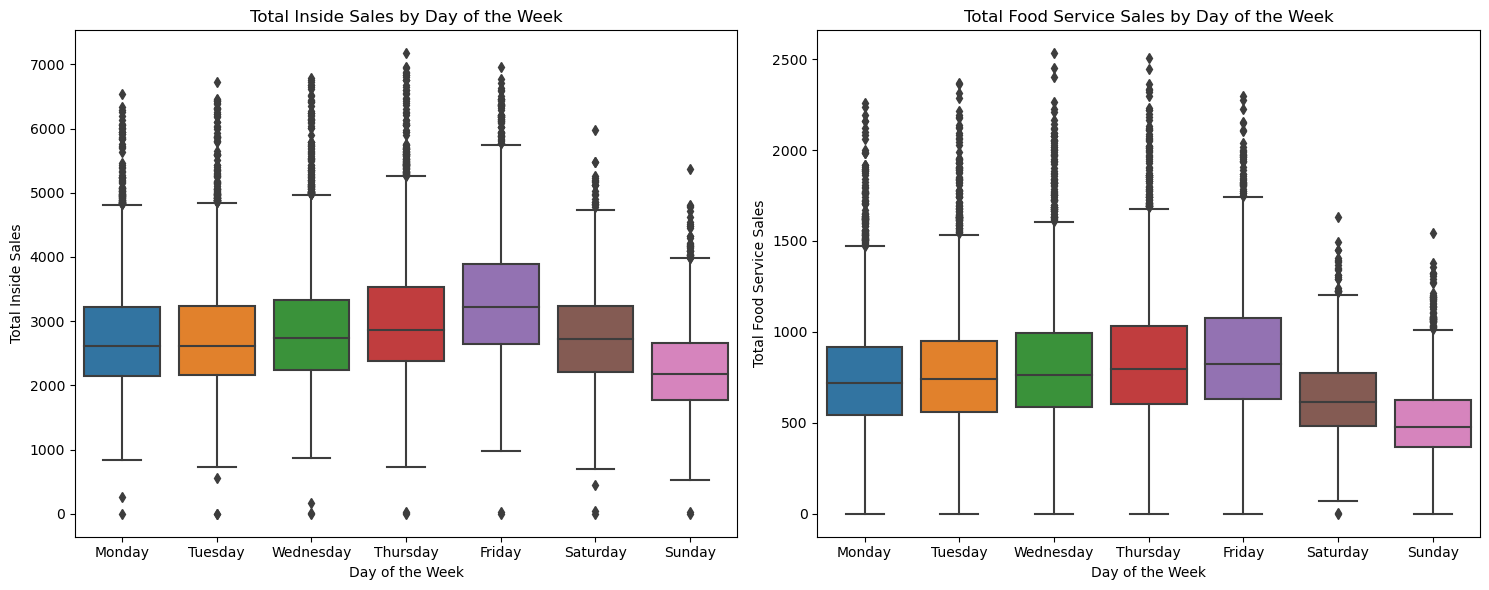

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

day = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Box plot of total_inside_sales by day of the week
sns.boxplot(ax=axes[0], x='calendar.day_of_week', y='daily_yoy_ndt.total_inside_sales', data=data,order=day)
axes[0].set_title('Total Inside Sales by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Inside Sales')

# Box plot of total_food_services by day of the week
sns.boxplot(ax=axes[1], x='calendar.day_of_week', y='daily_yoy_ndt.total_food_service', data=data,order=day)
axes[1].set_title('Total Food Service Sales by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Total Food Service Sales')

# Adjust spacing between the two subplots
plt.tight_layout()

# Show the combined figure
plt.show()

The box plot for total inside sales by day of the week shows that there is a clear pattern in sales through the week. Both median and the interquartile range suggests a consistent increase from Monday to Friday, peaking on Friday, and then a decrease over the weekend. Food service sales exhibit a similar trend to total inside sales, with a steady increase from Moday to Friday and a peak on Friday. This suggests that the customer behaviour and patterns for food service sales align with those of total inside sales.


Friday stands out as the top-performing day for total inside sales. This is the day when the median sales are at their highest. It's likely that this peak is due to increased customer traffic and higher sales volumes, possibly related to the end of the work week. On the other hand, Sunday has the lowest median sales among the days of the week. This dip may be because of many business operate with reduced hours on Sundays, resulting in lower sales. As with total inside sales, Friday is the day with the highest median food service sales. This could be due to the same factors that boost total inside sales on Fridays. Similarly Sunday has the lowest median food service sales. The lower sales on Sundays might be related to reduced operating hours or customer preferences.


Total inside sales have outliers on both the higher and lowe sides of the distribution. Outliers on the higher side could be indicative of unusually high sales days, which may be due to special promotions, events, or other factors. Outliers on the lower side may represent days with significantly lower sales, possibly due to adverse weather conditions or holidays.
Food service sales have more outliers on the higher side of the distribution. These outliers could represent days with exceptionally high food service sales, possibly driven by special menu items or promotions that are particularly popular with customers.

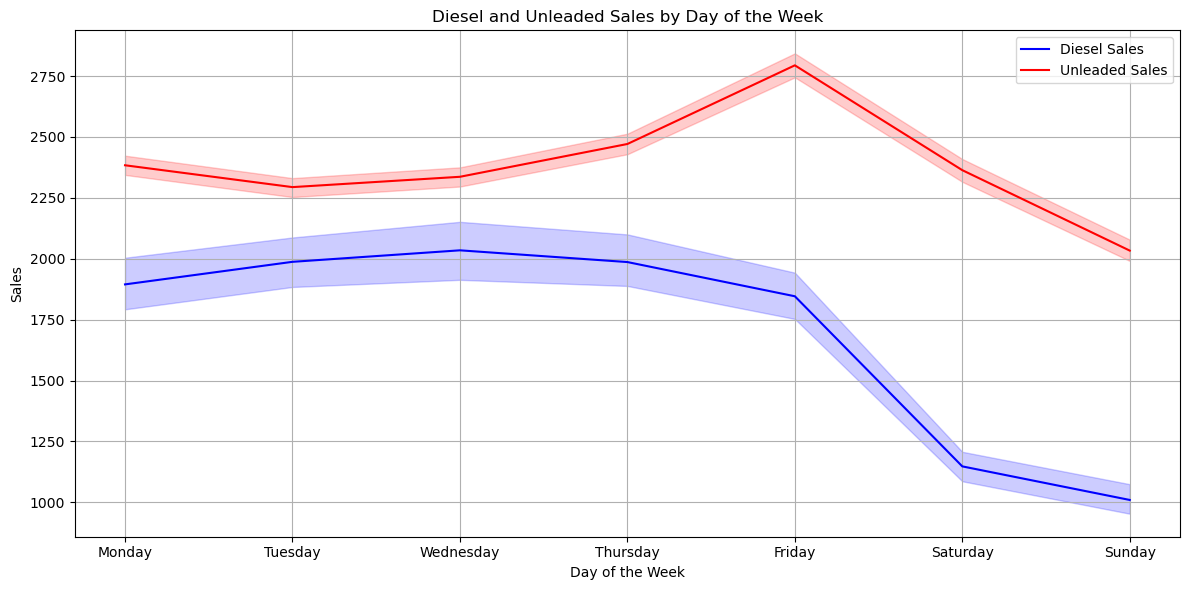

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('time_series_data_msba.csv')

# Assuming your data already has a 'calendar.day_of_week' column, and you want to set it as the index.
# If it's not in the correct order, you can use pd.Categorical to specify the order.
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['calendar.day_of_week'] = pd.Categorical(data['calendar.day_of_week'], categories=weekday_order, ordered=True)
data.set_index('calendar.day_of_week', inplace=True)

# Create a figure
plt.figure(figsize=(12, 6))

# Plot Diesel Sales
sns.lineplot(data=data, x=data.index, y='diesel', color='b', label='Diesel Sales')

# Plot Unleaded Sales on the same graph using a different color
sns.lineplot(data=data, x=data.index, y='unleaded', color='r', label='Unleaded Sales')

# Customize plot labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.title("Diesel and Unleaded Sales by Day of the Week")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Unleaded sales experience their highest sales volumes on Fridays. This could be attributed to the end of the workweek when many people are on the road, commuting  or preparing for weekend trips. Friday is often associated with increases travel and leisure activities, which lead to higher fuel consumption. Diesel sales reach their highest point on Wednesdays. This may be influenced by various factors such as requiring more diesel fuel for transportation purposes for industries and businesses.

Unleaded sales exhibit a significant decline over the weekend, with Sunday having the lowest sales. This is a common trend in the fuel industry, as weekends typically see reduced commuting and business-related travel. People tend to stay home more on Sundays, resulting in lower demand. Similarly, diesel sales also experience a decline on the weekend, with Sunday having the lowest sales. This can be explained by reducedd commercial activity and long-haul transportation on weekends, leading to decreased demand for diesel fuels.

Unleaded sales follow a pattern of gradual increase from Monday to Friday. This is likely due to the fact that people tend to drive more during the workweek, whether for commuting to work or running errands. As the workweek progresses, fuel consumption typically rises. There is a slight dip in unleaded sales from Monday to Tuesday. This couls be related to people conserving fuel early in the workweek or simply a minor fluctuation in daily driving patterns.
Diesel sales show a consistent increase from Monday to Friday, making the workweek the peak period for diesel consumption. This rise couls be attributed to the increases movement of goods and services during the workweek, including freight transportation and industrial ativities. Diesel sales exhibit a noticeable drop on Saturdays. This could be due to reduced industrial and commercial operations on weekends, as well as less long-distance trucking.

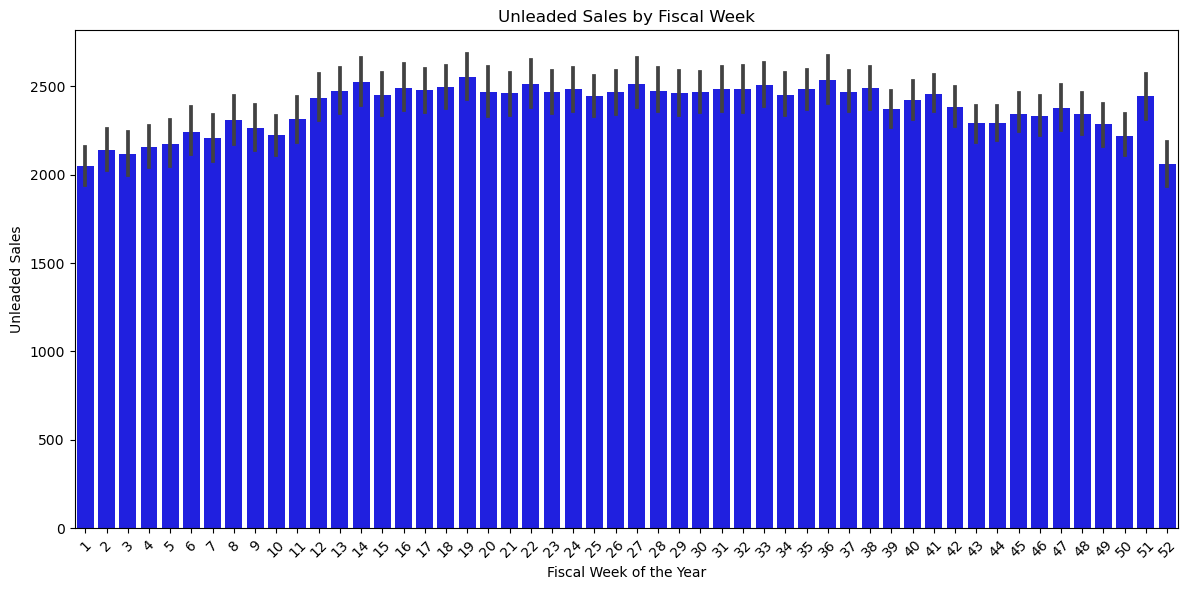

In [103]:
# Load the data
data = pd.read_csv('time_series_data_msba.csv')

# Set the date column as the index (if not already)
data.set_index('calendar.fiscal_week_id_for_year', inplace=True)

# Create the first figure for Unleaded Sales
plt.figure(figsize=(12, 6))

# Plot Unleaded Sales
sns.barplot(data=data, x=data.index, y='unleaded', color='b')
plt.xlabel("Fiscal Week of the Year")
plt.ylabel("Unleaded Sales")
plt.title("Unleaded Sales by Fiscal Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the first plot
plt.tight_layout()
plt.show()

Sales of unleaded fuel exhibit a distinct pattern throughout the year. At the begiining of the year, from the 1st to the 15th week, there is a steady and gradual increase in sales. This upward trajectory continues until the 15th week. From there, sales stabalize and remain relatively consistent within a certain range until the 38th week. We do not see much variation in sales figures during this time.

However, in the 38th week, a noticeable change occurs as sales start to decline gradually. This decline continues until the 51st week when there is an unexpected and significant positive spike in sales. This sudden increase could be due to various factors such as promotions, seasonal demand or other market dynamics.
Conversely, in the 52nd week, there is a sudden drop in dales which contrasts with the preceding week's surge. This drop might be attributted to factors like the end of special promotions or the holiday season coming to an end to the end of the year.

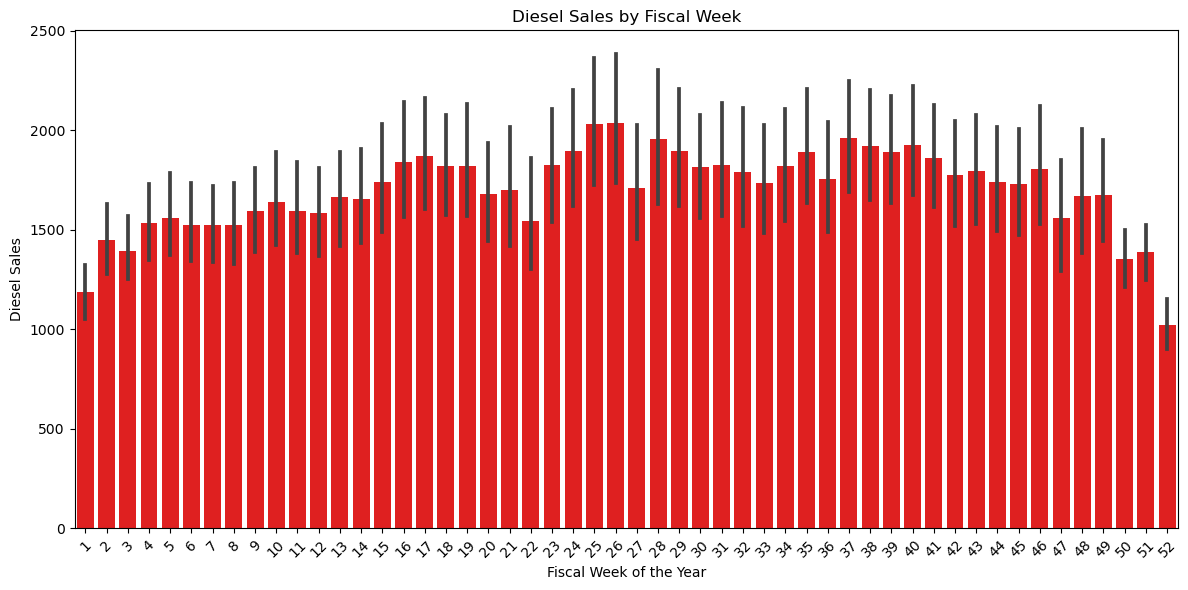

In [104]:
# Create the second figure for Diesel Sales
plt.figure(figsize=(12, 6))

# Plot Diesel Sales
sns.barplot(data=data, x=data.index, y='diesel', color='r')
plt.xlabel("Fiscal Week of the Year")
plt.ylabel("Diesel Sales")
plt.title("Diesel Sales by Fiscal Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the second plot
plt.tight_layout()
plt.show()

The sales of diesel follow a trajectory that includes initial growth, a mid-year dip, a resurgence, a sinusoidal fluctutaion and a gradual decline with a sudden drop at the end of the year.
At the beginning from 1st week to 17th week, there is a steady and gradual increase in sales. This period is marked by a consistent upward trend as more and more diesel is being sold.As we reach the 22nd week , there is a noticeable decline in sales which continues until the 27th week when there is a sudden resurgence and sales start to increase again. This period from the 27th to the 36th week, shows a wave-like pattern, with regular fluctuations in sales.

As we approach the 36th week, the sales begin to gradually decrease once more. Towards the end of the year, in the last three weeks, there is a sharp and abrupt drop in sales

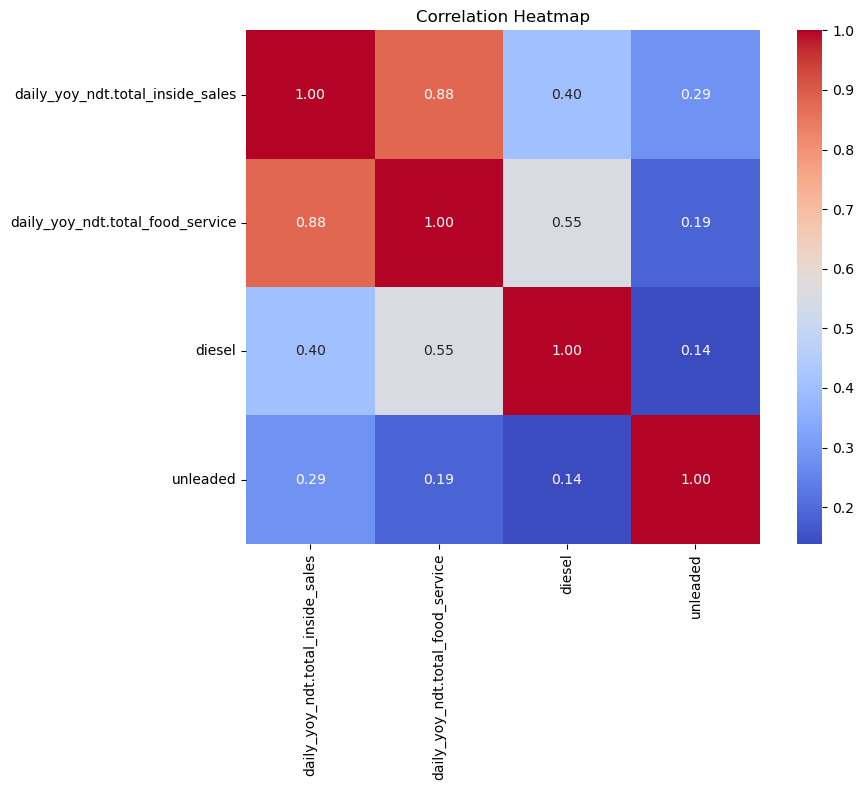

In [38]:
# Assuming you have a DataFrame 'df' containing your data
# Select the numeric columns for which you want to calculate correlations
numeric_columns = ["daily_yoy_ndt.total_inside_sales", "daily_yoy_ndt.total_food_service", "diesel", "unleaded"]

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Customize plot labels and title
plt.title("Correlation Heatmap")

# Show the plot
plt.tight_layout()
plt.show()

The heatmap analysis reveals a noteworthy positive correlation between the daily total inside sales and the daily total food services. This suggests that when the daily total inside sales increase, there is a tendency for the daily total food services to increase as well. This correlation implies a potentially complementary relationship between these two variables, where an uptick in one variable often accompanies a rise in the other.

In contrast, the heatmap illustrates a notable negative correlation between daily total inside sales and diesel sales. This implies that as daily total inside sales rise, diesel sales tend to decrease, and vice versa. This negative correlation suggests a potential trade-off or inverse relationship between these two variables, where an increase in one is often associated with a decrease in the other. Similar is the case with daily total food services towards diesel sales.

Similarly, we observe a negative correlation between daily total inside sales and unleaded sales in the heatmap. This indicates that when daily total inside sales go up, unleaded sales tend to decrease, and vice versa. Like the diesel sales correlation, this negative relationship suggests that there may be factors or dynamics at play that lead to an inverse pattern between daily total inside sales and unleaded sales. Similar is the case with daily total food services towards unleaded sales.

Furthermore, the heatmap uncovers a negative correlation between diesel and unleaded sales, indicating that when diesel sales increase, unleaded sales tend to decrease, and vice versa. This correlation suggests a potential competition or substitution effect between these two types of fuel sales, where an increase in one is associated with a decrease in the other.

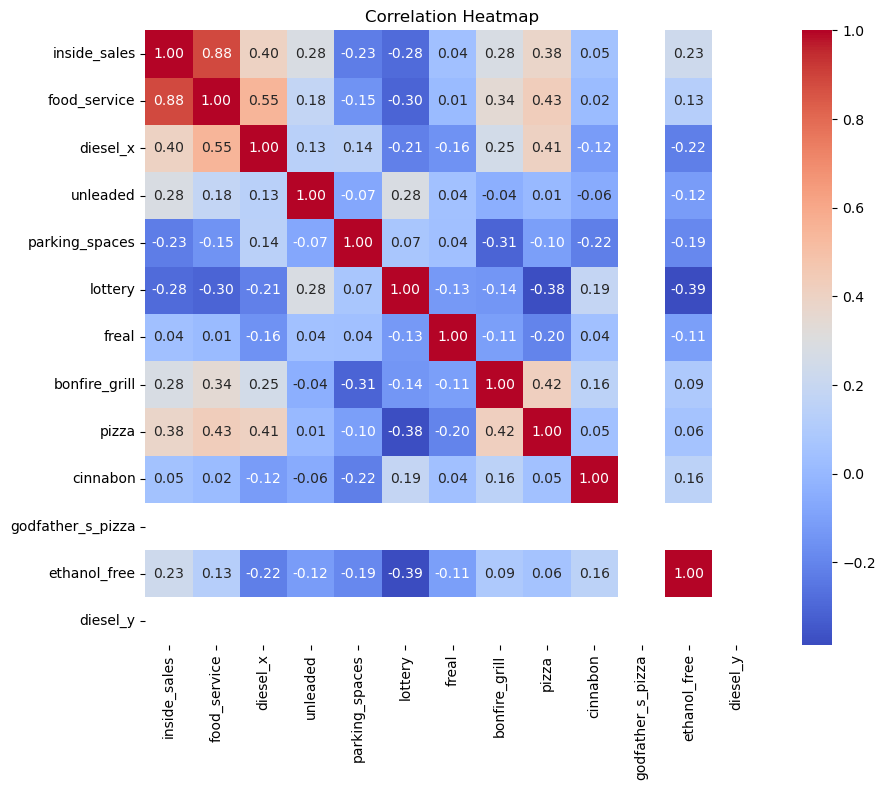

In [64]:
df = pd.read_csv('merged_data.csv')

# List of numeric columns
numeric_columns = ["inside_sales", "food_service", "diesel_x", "unleaded",
                   "parking_spaces", "lottery", "freal", "bonfire_grill", 
                   "pizza", "cinnabon", "godfather_s_pizza", "ethanol_free", "diesel_y"]

# Convert "Yes" and "No" to 1 and 0 for binary variables
binary_columns = ["lottery", "freal", "bonfire_grill", "pizza", "cinnabon", "godfather_s_pizza", "ethanol_free", "diesel_y"]

df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Customize plot labels and title
plt.title("Correlation Heatmap")

# Show the plot
plt.tight_layout()
plt.show()


Inside sales exhibit a positive correlation with pizza. There is a complementary relationship between customers buying other products inside the store and choosing pizza. Customers may have different preferences when it comes to other products and increasing inside sales does not necessarily lead to an increase in the sales of these items.

Food Sales demonstrates positive correlation with both bonfire_grill and pizza.It indicates a positive synergy between food service offerings and these specific food items. Food service sales have negative correlations with other products mentioned. 

Diesel sales have negative correlations with most of the products, exept pizza. This suggests that when diesel sales increase, sales of other products tend to decrease or remain stable. The exception is pizza, which may have a different consumer base or usage pattern.
Unleaded sales display negative correlation with all the products mentioned above. This implies that the sales of the products tend to decrease or remain stable when Unleaded sales increases. Unleaded sales might not be closely related to these product categories.

## Modelling

### Data Preparation (Time Series)

In [ ]:
# Load your dataset
df = pd.read_csv("../Maverik_Capstone/data/merged_data.csv")  # Replace with your data file path

In [ ]:
# Convert date columns to datetime objects
df['capital_projects.soft_opening_date'] = pd.to_datetime(df['capital_projects.soft_opening_date'])
df['calendar.calendar_day_date'] = pd.to_datetime(df['calendar.calendar_day_date'])

# Ensure the data is sorted by date
df = df.sort_values(by='capital_projects.soft_opening_date')

# Create lag features for each sales metric to capture seasonality
lags = [1, 7, 30, 365]  # Example lag periods (1 day, 1 week, 1 month, 1 year)
for metric in ['inside_sales', 'food_service', 'diesel_x', 'unleaded']:
    for lag in lags:
        df[f'{metric}_lag_{lag}'] = df[metric].shift(lag)
        
        
# Create additional time-related features
df['day_of_week'] = df['capital_projects.soft_opening_date'].dt.dayofweek
df['day_of_month'] = df['capital_projects.soft_opening_date'].dt.day
df['month'] = df['capital_projects.soft_opening_date'].dt.month
df['year'] = df['capital_projects.soft_opening_date'].dt.year

# Print the updated DataFrame
# print(df)

### ARIMA Model

#### Inside Sales

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'inside_sales'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['inside_sales'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

#### Food Service

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'food_service'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['food_service'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

#### Diesel

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'diesel_x'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['diesel_x'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

#### Unleaded Gasoline

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
metric_to_forecast = 'unleaded'

# Split your data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
validation_data = df[train_size:]

# Define the order of the SARIMA model (p, d, q, P, D, Q, s)
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (to make the time series stationary)
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal I order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (e.g., 7 for daily data with weekly seasonality)

# Create and fit the SARIMA model
model = SARIMAX(train_data[metric_to_forecast], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=0)

print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast_values = model_fit.forecast(steps=len(validation_data))

actual_values = df['unleaded'][-len(forecast_values):]

squared_errors = (actual_values - forecast_values) ** 2


# Calculate MAE to assess model performance
mae = mean_absolute_error(validation_data[metric_to_forecast], forecast_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast_values)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

The accuracy of the ARIMA model was marginal and it was determined to examine other models for improved performance.

### Exponential Smoothing Model

#### Inside Sales ESM

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'inside_sales'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

### Food Service ESM

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'food_service'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

#### Diesel ESM

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'diesel_x'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

### Unleaded Gasoline ESM

In [ ]:
# Define the sales metric you want to forecast (e.g., total_inside_sales)
target_metric = 'unleaded'

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
val_data = df[train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data[target_metric], seasonal='add', seasonal_periods=365)  # You can adjust seasonal_periods
model_fit = model.fit()

# print(model_fit.summary())

In [ ]:
# Make forecasts on the validation set
forecast = model_fit.forecast(steps=len(val_data))

# Calculate squared errors
squared_errors = (val_data[target_metric] - forecast) ** 2

# Calculate MAE to assess model performance
mae = mean_absolute_error(val_data[target_metric], forecast)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(val_data[target_metric], forecast)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MAE and assess whether it meets your performance benchmark
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# Plot the actual and forecasted data for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data['capital_projects.soft_opening_date'], train_data[target_metric], label='Training Data')
plt.plot(val_data['capital_projects.soft_opening_date'], val_data[target_metric], label='Validation Data')
plt.plot(val_data['capital_projects.soft_opening_date'], forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel(target_metric)
plt.title('Exponential Smoothing Forecast')
plt.show()

Exponential Smoothing showed improved accuracy over ARIMA.

### Prophet Model

#### Inside Sales PM

In [ ]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'inside_sales']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Actual values for the validation set
actual_values = df['inside_sales'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


#### Food Service PM

In [ ]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'food_service']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [ ]:
# Actual values for the validation set
actual_values = df['food_service'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

#### Diesel PM

In [ ]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'diesel_x']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [ ]:
# Actual values for the validation set
actual_values = df['diesel_x'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

#### Unleaded Gasoline PM

In [ ]:
# Create a DataFrame with 'ds' and 'y' columns for Prophet
prophet_df = df[['calendar.calendar_day_date', 'unleaded']]
prophet_df.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Get forecast for future dates
forecast = model.predict(future)

fig = model.plot(forecast)

In [ ]:
# Actual values for the validation set
actual_values = df['unleaded'][-len(forecast):]

# Predicted values from the Prophet forecast
predicted_values = forecast['yhat'][-len(forecast):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

The Prophet model was able to capture seasonality, however the mean accuracy of the model was less than that of Exponential Smoothing.